In [1]:
%matplotlib inline

In [2]:
from nose.tools import *
# Write your imports in the cell below

In [3]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [4]:
np.random.seed(1234)

# Model Training and Improvement Lab
## Comparing and selecting models

### 1. Read the data (1 point)
Like in the previous lab, you need to read the Portuguese bank dataset [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/). It has been provided for you in the `data` folder.

Read the dataset using `pandas` (you can use the library with the alias `pd`). Save it in the `bank_data` variable.

In [5]:
bank_data = None
# YOUR CODE HERE
bank_data = pd.read_csv(r"data/bank.csv", sep=";")

In [6]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [7]:
# From now on, all test cells might contain hidden tests. If you follow the instructions correctly, 
# your solution will be graded with maximum points
assert_is_not_none(bank_data)

### 2. Preprocess the data (1 point)
Separate explanatory features from labels. Save all features (16 columns total) in the variable `bank_features`. Save the labels (corresponding to the `y` column) in the `bank_labels` variable. Rewrite the labels to be `0` and `1` instead of `no` and `yes`: `bank_labels` should be a numeric column.

In [8]:
bank_features, bank_labels = None, None
# YOUR CODE HERE
bank_features = bank_data.drop("y", axis=1)
bank_labels = bank_data.y.apply(lambda x: 1 if x=="yes" else 0)

In [9]:
# bank_labels

In [10]:
assert_is_not_none(bank_features)
assert_is_not_none(bank_labels)

### 3. Get indicator variables (1 point)
Get indicator (dummy) variables for all categorical columns in `bank_features`. Overwrite the `bank_features` variable to store the new data.

In [11]:
# bank_features.dtypes

In [12]:
# YOUR CODE HERE
bank_features = pd.get_dummies(bank_features)

In [13]:
assert_equal(bank_features.shape, (4521, 51))

### 4. Split the data (1 point)
Split the data into training and testing set, with 70% of the data for training. Because the output labels are not equaly distributed, use stratification based on the `bank_labels`.

In [14]:
bank_features_train, bank_labels_train = None, None
bank_features_test, bank_labels_test = None, None
# YOUR CODE HERE
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_features, bank_labels, train_size = 0.7, stratify = bank_labels)

In [15]:
assert_is_not_none(bank_features_train)
assert_is_not_none(bank_labels_train)
assert_is_not_none(bank_features_test)
assert_is_not_none(bank_labels_test)

### 5. Train a baseline algorithm (1 point)
Train a logistic regression using the training data. Use 1 000 000 (`1e6`) as the value of C. Score it using the testing data. Save the score in the `baseline_score` variable. You should see a fairly high score.

In [16]:
model = None
baseline_score = None

# YOUR CODE HERE
model = LogisticRegression(C=1e6, solver = "liblinear") #, solver = "liblinear"
model.fit(bank_features_train, bank_labels_train)
baseline_score = model.score(bank_features_test, bank_labels_test)

In [17]:
baseline_score

0.899042004421518

In [18]:
assert_is_not_none(model)
assert_greater(baseline_score, 0.7)

### 6. Select a better score (2 points)
As you alrady saw, the positive examples are very few. If you aren't convinced, just check the counts.

We know that the default scoring (accuracy) isn't correct in this case. Better measures would be precision and recall. However, we only want one number. Evaluate the algorithm once again, using a standard scoring method which combines precision and recall. Overwrite the `baseline_score` variable.

Don't forget to score the model on the testing data only.

In [19]:
# YOUR CODE HERE
bank_predict_test = model.predict(bank_features_test)
baseline_score = f1_score(bank_labels_test, bank_predict_test)
print(baseline_score)

0.41201716738197425


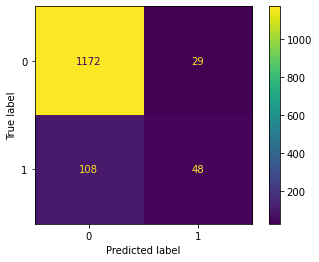

In [20]:
plot_confusion_matrix(model, bank_features_test, bank_labels_test)

In [21]:
assert_less(baseline_score, 0.7)

### 7. Tune your model (2 points)
Fine-tune the `C` and `max_iter` parameters.

Use full grid search with the following values:
* `C`: 0.0001, 0.01, 0.1, 1, 10, 100, 10000
* `max_iter`: 50, 100, 300, 1000
* `fit_itercept`: True, False

Save the grid search result in the `grid_search` variable. Don't forget to use the better scoring model that you obtained in the previous task.

In [22]:
grid_search = None
# YOUR CODE HERE
tunning_params = [{
                    "C": [0.0001, 0.01, 0.1, 1, 10, 100, 10000],
                    "max_iter": [50, 100, 300, 1000],
#                     "fit_itercept": [True, False]
                }]
grid_search = GridSearchCV(LogisticRegression(solver = "liblinear"), tunning_params, scoring="f1")
grid_search.fit(bank_features_train, bank_labels_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100, 10000],
                          'max_iter': [50, 100, 300, 1000]}],
             scoring='f1')

In [23]:
print(grid_search.best_params_) # Estimator: grid.best_

{'C': 100, 'max_iter': 50}


In [24]:
print(grid_search.best_estimator_)

LogisticRegression(C=100, max_iter=50, solver='liblinear')


In [25]:
assert_is_not_none(grid_search)
assert_is_not_none(grid_search.best_estimator_)

### 8. Compare scores (1 point)
Use the best estimator from your grid search. Score it using the function from problem 6. Save your answer in `tuned_score`.

In [26]:
tuned_score = None
# YOUR CODE HERE
# model_tuned = LogisticRegression(C=100, max_iter=1000)
model_tuned = grid_search.best_estimator_
model_tuned.fit(bank_features_train, bank_labels_train)
bank_predict_test_tuned = model_tuned.predict(bank_features_test)
tuned_score = f1_score(bank_labels_test, bank_predict_test_tuned)

In [27]:
print(tuned_score)

0.4034334763948498


In [28]:
print(baseline_score - tuned_score)

0.00858369098712447


Hmmmm, it seems we have not obtained a better algorithm, even the opposite (the difference is marginal and depends on the random initialization of the cross-validation datasets).

We can, of course, do a lot more things to improve our model's performance, such as normalizing the data, feature selection and feature engineering, trying out different aspects, e.g. polynomial terms, RANSAC; even boosting (we'll talk about this later). However, we'll stop at this point.

What can we conclude? It seems that this is close to the best performance we can get out of this algorithm, given these data points.

We can try improving (cleaning) our dataset, selecting features, etc. but we most likely need a better algorithm. In the next labs, we're going to explore that.